In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


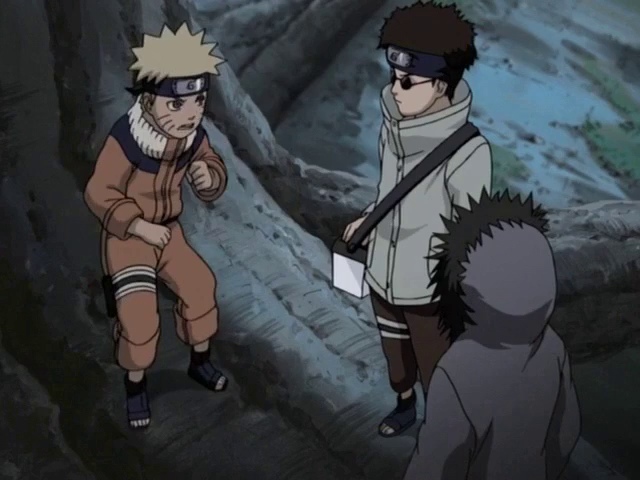

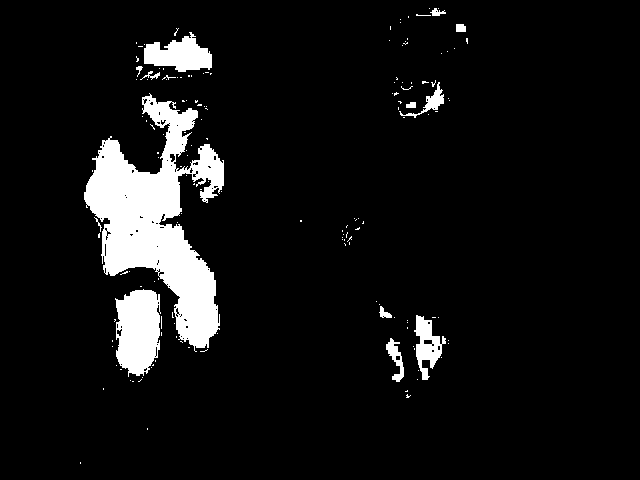

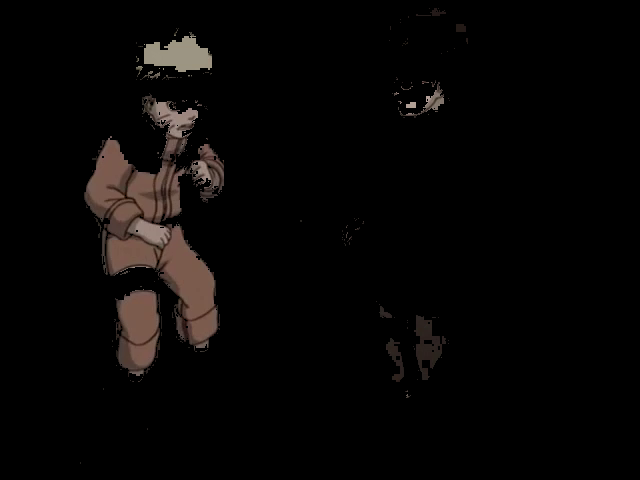

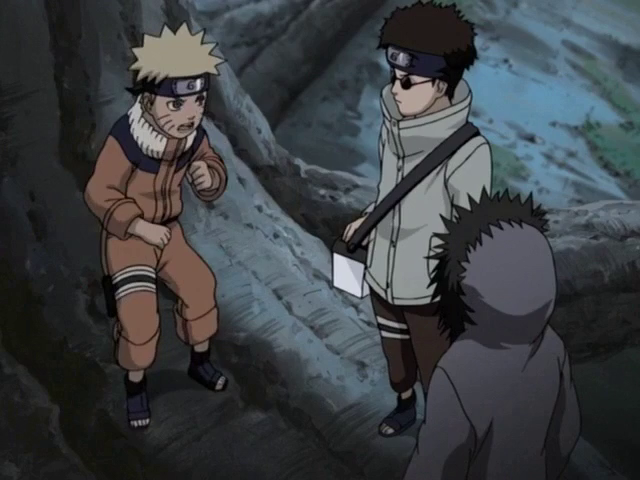

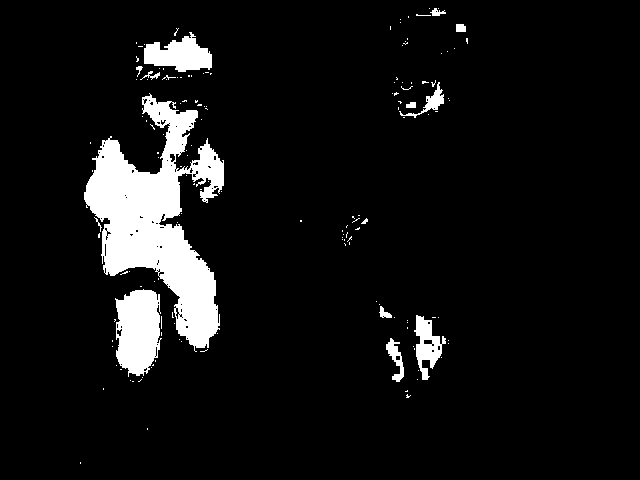

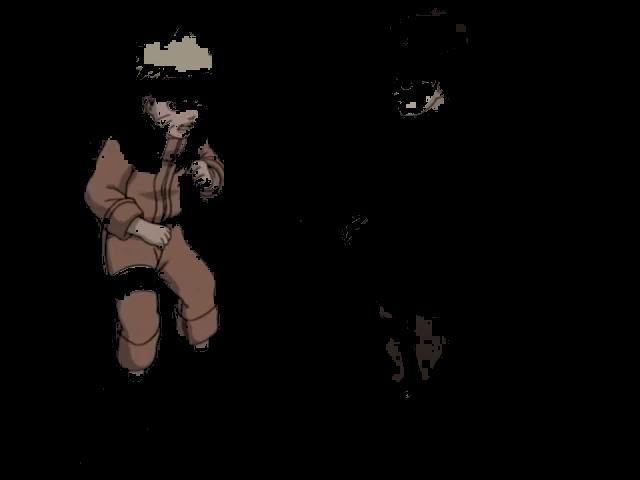

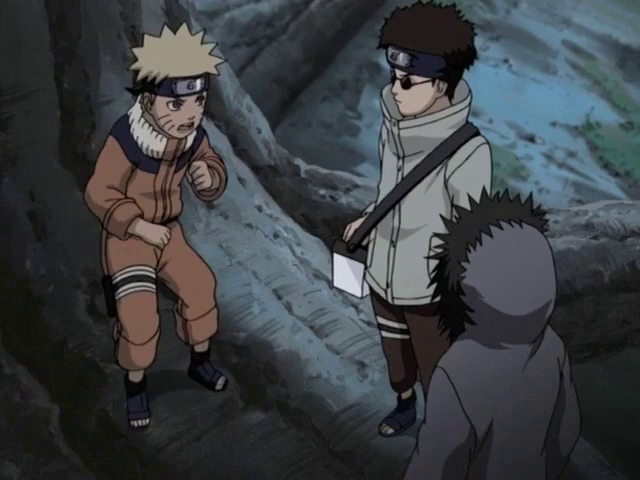

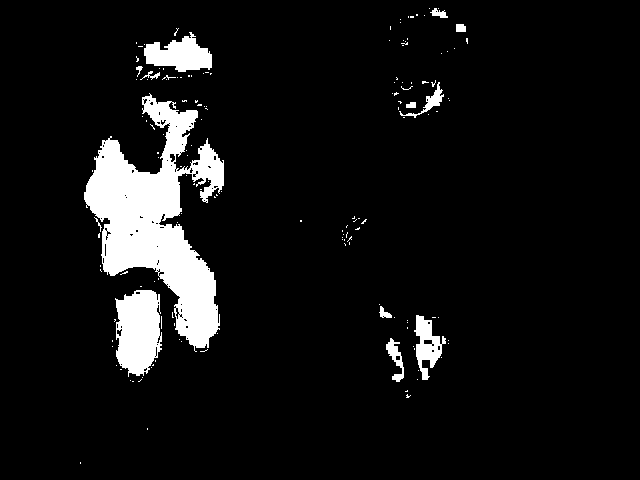

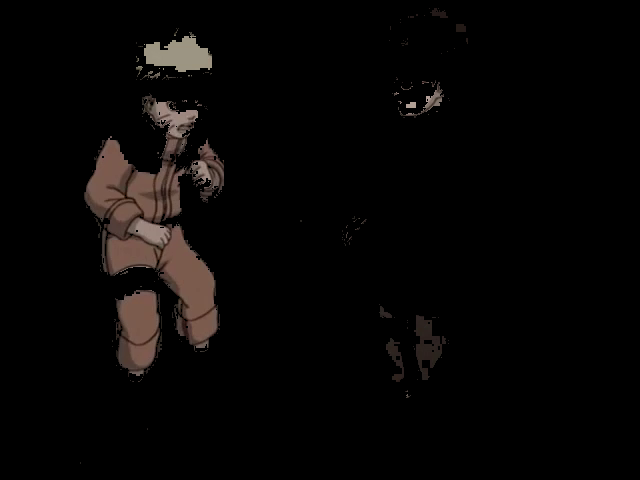

In [19]:
from zmq.constants import QUEUE
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
  
# define a video capture object
vid = cv.VideoCapture("/content/Naruto_more_cutted.mp4")

timer = 3

while(timer != 0):
      
    ret, frame = vid.read()  # Take each frame
    
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)  # Convert BGR to HSV

    # upper_orange = np.array([3, 39, 35])  # define range of orange color in HSV
    # lower_orange = np.array([15, 31, 51])

    ORANGE_MIN = np.array([3, 39, 35])
    ORANGE_MAX = np.array([25, 255, 255])
    COLOR_MIN = ORANGE_MIN
    COLOR_MAX = ORANGE_MAX

    # lower_orange = np.array([3, 39, 35])  # define range of orange color in HSV
    # upper_orange = np.array([32, 76, 100])

    mask = cv.inRange(hsv, COLOR_MIN, COLOR_MAX)  # Threshold the HSV image to get only blue colors

    res = cv.bitwise_and(frame,frame, mask= mask)
    cv2_imshow(frame)
    cv2_imshow(mask)
    cv2_imshow(res)

    # cv2_imshow(frame)
      
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
    
    timer -= 1
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv.destroyAllWindows()